In [2]:
# COMP647 Assignment 02 - Data Preprocessing
# Supplement Recommendation System Based on Health and Dietary Data
# Student: Aeryun Park | Dataset: Patient Health Information 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)      
pd.set_option('display.max_rows', None)   
pd.set_option('display.max_colwidth', None)

# Load the healthcare dataset containing patient information
# This dataset will be used to recommend appropriate Korure supplement categories
# based on individual health conditions and lifestyle factors
df = pd.read_csv('1167330_AeryunPark.csv')


In [3]:
# Display dataset dimensions to understand the scale of patient data
# Important for understanding the scope of our supplement recommendation model
print ("Dataset Shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())


Dataset Shape: (1000, 20)

Column names:
['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Disease_Type', 'Severity', 'Physical_Activity_Level', 'Daily_Caloric_Intake', 'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL', 'Dietary_Restrictions', 'Allergies', 'Preferred_Cuisine', 'Weekly_Exercise_Hours', 'Adherence_to_Diet_Plan', 'Dietary_Nutrient_Imbalance_Score', 'Diet_Recommendation']


In [4]:
# Examine the structure and first few records to understand health data format
# This helps identify key health indicators relevant for supplement classification
df.head()


,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [5]:
df.columns.tolist()


['Patient_ID',
 'Age',
 'Gender',
 'Weight_kg',
 'Height_cm',
 'BMI',
 'Disease_Type',
 'Severity',
 'Physical_Activity_Level',
 'Daily_Caloric_Intake',
 'Cholesterol_mg/dL',
 'Blood_Pressure_mmHg',
 'Glucose_mg/dL',
 'Dietary_Restrictions',
 'Allergies',
 'Preferred_Cuisine',
 'Weekly_Exercise_Hours',
 'Adherence_to_Diet_Plan',
 'Dietary_Nutrient_Imbalance_Score',
 'Diet_Recommendation']

In [6]:
df.dtypes


Patient_ID                           object
Age                                   int64
Gender                               object
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                         object
Severity                             object
Physical_Activity_Level              object
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                 object
Allergies                            object
Preferred_Cuisine                    object
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                  object
dtype: object

In [7]:
# Get basic statistics
df.describe()


,Age,Weight_kg,Height_cm,BMI,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,49.857000,84.602400,174.81700,28.191600,2475.064000,199.717900,144.993000,136.867600,5.166000,74.88430,2.469200
std,18.114267,20.088121,14.33377,8.040136,565.017032,29.080614,20.245712,37.934819,2.847995,14.82638,1.459631
min,18.000000,50.000000,150.00000,13.000000,1500.000000,150.400000,110.000000,70.200000,0.000000,50.00000,0.000000
25%,35.000000,66.600000,162.00000,22.075000,1984.750000,174.300000,128.000000,105.000000,2.800000,62.00000,1.200000
50%,50.000000,85.200000,175.00000,27.450000,2470.500000,199.850000,145.000000,138.000000,5.200000,74.20000,2.400000
75%,66.000000,102.000000,187.00000,33.425000,2937.250000,224.850000,163.000000,170.650000,7.600000,88.20000,3.700000
max,79.000000,119.700000,199.00000,52.400000,3498.000000,249.900000,179.000000,200.000000,10.000000,100.00000,5.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [9]:
# Comprehensive missing data assessment across all health variables
# Missing health data patterns can affect supplement recommendation accuracy
df.isnull().sum()


Patient_ID                            0
Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
dtype: int64

In [10]:
# Detailed analysis of categorical health columns with missing values
missing_cols = ['Disease_Type', 'Dietary_Restrictions', 'Allergies']
for col in missing_cols:
    print(f"{col} unique value:")
    print(df[col].value_counts(dropna=False))
    print("-"*30)


Disease_Type unique value:
Disease_Type
Hypertension    316
Diabetes        258
Obesity         222
NaN             204
Name: count, dtype: int64
------------------------------
Dietary_Restrictions unique value:
Dietary_Restrictions
Low_Sodium    350
NaN           334
Low_Sugar     316
Name: count, dtype: int64
------------------------------
Allergies unique value:
Allergies
Gluten     346
Peanuts    331
NaN        323
Name: count, dtype: int64
------------------------------


In [11]:
# Use domain-specific 'None' imputation for supplement recommendation context
# Missing values in health-related categorical variables likely indicate absence
# of conditions rather than unknown conditions, which is valuable for supplement targeting
df['Disease_Type'] = df['Disease_Type'].fillna('None')
df['Dietary_Restrictions'] = df['Dietary_Restrictions'].fillna('None')
df['Allergies'] = df['Allergies'].fillna('None')

# Verification that imputation was successful
df.isnull().sum()


Patient_ID                          0
Age                                 0
Gender                              0
Weight_kg                           0
Height_cm                           0
BMI                                 0
Disease_Type                        0
Severity                            0
Physical_Activity_Level             0
Daily_Caloric_Intake                0
Cholesterol_mg/dL                   0
Blood_Pressure_mmHg                 0
Glucose_mg/dL                       0
Dietary_Restrictions                0
Allergies                           0
Preferred_Cuisine                   0
Weekly_Exercise_Hours               0
Adherence_to_Diet_Plan              0
Dietary_Nutrient_Imbalance_Score    0
Diet_Recommendation                 0
dtype: int64

In [12]:
# Check Patient_ID duplicates first (most important)
patient_duplicates = df['Patient_ID'].duplicated().sum()
print(f"Patient_ID Duplicate Count: {patient_duplicates}")
print("*" * 50)


Patient_ID Duplicate Count: 0
**************************************************


In [13]:
# Optional : Quick check for suspicious duplicates
suspicious_cols = ['Weight_kg', 'Height_cm', 'BMI']
for col in suspicious_cols:
    if col in df.columns:
        dup_count = df[col].duplicated().sum()
        print(f"{col}: {dup_count} duplicates")


Weight_kg: 462 duplicates
Height_cm: 950 duplicates
BMI: 686 duplicates


In [14]:
# Check if these duplicates are normal
print("== Duplicate Analysis ==")
total_rows = len(df)
print(f"Total patients: {total_rows}")

cols_to_check = ['Weight_kg', 'Height_cm', 'BMI']
for col in cols_to_check:
    if col in df.columns:
        dup_count = df[col].duplicated().sum()
        percentage = (dup_count / total_rows) * 100
        print(f"{col}: {dup_count} duplicates ({percentage:.1f})")


== Duplicate Analysis ==
Total patients: 1000
Weight_kg: 462 duplicates (46.2)
Height_cm: 950 duplicates (95.0)
BMI: 686 duplicates (68.6)


In [ ]:
# Check actual height values and their frequencies
print("== Height Value Analysis ==")
print("Most common heights:")
print(df['Height_cm'].value_counts().head(10))

print(f"\nTotal unique height: {df['Height_cm'].nunique()}")
print(f"Height range: {df['Height_cm'].min()} - {df['Height_cm'].max()}")


== Height Value Analysis ==
Most common heights:
Height_cm
170    28
177    28
190    27
184    27
168    26
198    26
183    26
160    25
157    25
196    25
Name: count, dtype: int64

Total unique height: 50
Height range: 150 - 199


In [ ]:
# Identify constant features (columns with only one unique value)
# Such features provide no predictive value for supplement category classification
# However, their presence might indicate issues in health data collection
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: []


In [ ]:
# Define IQR-based outlier detection function for health metrics
# CHOICE RATIONALE: IQR method chosen for supplement recommendation because:
# 1. Health data often follows non-normal distributions
# 2. Extreme health values are meaningful for supplement targeting (e.g., severe obesity → Detox category)
# 3. Provides interpretable cutoff points for supplement category rules
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    return lower_limit, upper_limit

# Systematic outlier analysis across health metrics relevant for supplement classification
# Focus on key health indicators that will inform supplement category mapping:
# - BMI, Blood Pressure, Glucose → potential Heart Health/Detox candidates
# - Cholesterol → Heart Health supplement candidates
numeriacl_cols = ['Age', 'Weight_kg', 'Height_cm', 'BMI', 'Daily_Caloric_Intake', 'Cholesterol_mg_dL', 
                  'Blood_Pressure_mmHg', 'Clucose_mg_dL', 'Weekly_Exercise_Hours']

for col in numeriacl_cols:
    if col in df.columns:
        lower, upper = find_outliers_IQR_method(df, col)
        outliers_count = len(df[(df[col] < lower) | (df[col] > upper)])
        print(f"{col}: {outliers_count} outliers (range: {lower:.1f} - {upper:.1f})")
        print("*"*50)

# Add to the end of cell 16
# Store BMI outliers for detailed analysis
lower_bmi, upper_bmi = find_outliers_IQR_method(df, 'BMI')
bmi_outliers = df[(df['BMI'] < lower_bmi) | (df['BMI'] > upper_bmi)]
print(f"\n{len(bmi_outliers)} BMI outliers stored successfully")


Age: 0 outliers (range: -11.5 - 112.5)
**************************************************
Weight_kg: 0 outliers (range: 13.5 - 155.1)
**************************************************
Height_cm: 0 outliers (range: 124.5 - 224.5)
**************************************************
BMI: 4 outliers (range: 5.1 - 50.4)
**************************************************
Daily_Caloric_Intake: 0 outliers (range: 556.0 - 4366.0)
**************************************************
Blood_Pressure_mmHg: 0 outliers (range: 75.5 - 215.5)
**************************************************
Weekly_Exercise_Hours: 0 outliers (range: -4.4 - 14.8)
**************************************************

4 BMI outliers stored successfully


In [ ]:
# Show outlier details with related columns
print("\nBMI Outlier Details:")
outlier_details = bmi_outliers[['Patient_ID', 'BMI', 'Weight_kg', 'Height_cm', 'Age', 'Disease_Type']].copy()
print(outlier_details.sort_values('BMI'))



BMI Outlier Details:
    Patient_ID   BMI  Weight_kg  Height_cm  Age  Disease_Type
455      P0456  51.0      114.8        150   36  Hypertension
323      P0324  51.4      117.3        151   23  Hypertension
838      P0839  52.0      118.5        151   57      Diabetes
830      P0831  52.4      119.5        151   75       Obesity


In [ ]:
# Validate BMI calculations to ensure accurate supplement category assignment
# Cross-check computed BMI against recorded BMI to prevent misclassification
print("== BMI Calculation Verification ==")
outlier_patients = ['P0456', 'P0324', 'P0839', 'P0831']

for patient_id in outlier_patients:
    patient_data = df[df['Patient_ID'] == patient_id]
    if not patient_data.empty:
        weight = patient_data['Weight_kg'].iloc[0]
        height_cm = patient_data['Height_cm'].iloc[0]
        height_m = height_cm / 100 # Convert cm to meters for BMI formula
        calculated_bmi = weight / (height_m ** 2) # Standard BMI formula: kg/m²
        recorded_bmi = patient_data['BMI'].iloc[0]
        
        print(f"Patient {patient_id}:")
        print(f"  Calculated BMI: {calculated_bmi:.1f}")
        print(f"  Recorded BMI: {recorded_bmi:.1f}")
        print(f"  Match: {abs(calculated_bmi - recorded_bmi) < 0.1}")
        print()


== BMI Calculation Verification ==
Patient P0456:
  Calculated BMI: 51.0
  Recorded BMI: 51.0
  Match: True

Patient P0324:
  Calculated BMI: 51.4
  Recorded BMI: 51.4
  Match: True

Patient P0839:
  Calculated BMI: 52.0
  Recorded BMI: 52.0
  Match: True

Patient P0831:
  Calculated BMI: 52.4
  Recorded BMI: 52.4
  Match: True



In [ ]:
# DECISION: PRESERVE BMI outliers in the dataset for supplement recommendation model
# SUPPLEMENT BUSINESS JUSTIFICATION: BMI values of 51-52 represent the core target market
# for Korure Detox products. These patients are:
# 1. Most in need of weight management supplement intervention
# 2. Represent high-value customers for supplement business
# 3. Provide crucial training data for Detox category classification
# 4. Mathematically verified as accurate measurements


In [ ]:
#==========================================================================================
# KORURE SUPPLEMENT CATEGORY MAPPING
#==========================================================================================

# Create target variable for supplement recommendation based on health indicators
# This mapping connects individual health conditions to appropriate Korure product categories
# following the rule-based approach outlined in the project proposal


 # Korure Products



 ## Product Categories



 ### Joint Health - MP Oil, MP Powder, Relief Cream

 Target: Age 65+, high BMI + older adults, high exercise hours

 Focus: Joint care and mobility support



 ### Cardiovascular Health - Algae Oil (Plant Omega-3)

 Target: High blood pressure, high cholesterol, diabetes, hypertension

 Focus: Heart health and circulation



 ### Digestive Health - Kiwi Prebiotic + Vitamin C

 Target: Moderate risk group and general health management group

 Focus: Preventive health care and basic nutritional support



 ## Algorithm Priority (Check Order)

 1. Joint Health (age/mobility issues)

 2. Cardiovascular Health (heart disease risk)

 3. Digestive Health (remaining patients)

In [ ]:
# KORURE SUPPLEMENT CATEGORY MAPPING
# 3 Categories: Joint Health, Digestive Health

def assign_supplement_category(row):
    """
    Function to recommend appropriate Korure product category based on patient's health data
    
    Category descriptions:
    - Joint Health: Joint care products (MP Oil, MP Powder, Relief Cream)
    - Cardiovascular Health: Heart health products (Algae Oil - Plant Omega-3)
    - Digestive Health: Digestive support products (Kiwi Prebiotic + Vitamin C)
    """
    
    # Priority 1: Joint Health
    # Age-related joint degeneration, obesity-related joint stress, and overuse from excessive exercise
    if (row['Age'] >= 65 or 
        (row['BMI'] >= 35 and row['Age'] >= 55) or 
        (row['Age'] >= 45 and row['Weekly_Exercise_Hours'] >= 9)):
        return 'Joint Health'
    
    # Priority 2: Cardiovascular Health  
    # Patients with elevated cardiovascular risk markers
    if (row['Blood_Pressure_mmHg'] >= 160 or 
        row['Cholesterol_mg/dL'] >= 240 or
        row['Disease_Type'] in ['Diabetes', 'Hypertension']):
        return 'Cardiovascular Health'
    
    # Priority 3: Digestive Health
    # All remaining patients assigned to digestive health category
    # This includes patients with digestive issues, dietary restrictions, or general health maintenance needs
    return 'Digestive Health'


In [ ]:
# Apply mapping function to create supplement category recommendations
print("Starting Korure product category mapping with 3 categories...")
df['Korure_Category'] = df.apply(assign_supplement_category, axis=1)

# Display mapping results
print("\n== Mapping Results ==")
category_counts = df['Korure_Category'].value_counts()
print(category_counts)

print(f"\nOut of {len(df)} total patients:")
for category, count in category_counts.items():
    percentage = (count/len(df)) * 100
    print(f"- {category}: {count} patients ({percentage:.1f}%)")

# Show sample mapping results
print("\n== Sample Mapping Results ==")
sample_data = df[['Patient_ID', 'Age', 'BMI', 'Disease_Type', 'Physical_Activity_Level', 
                  'Blood_Pressure_mmHg', 'Cholesterol_mg/dL', 'Weekly_Exercise_Hours', 'Korure_Category']].head(10)
print(sample_data.to_string(index=False))


Starting Korure product category mapping with 3 categories...

== Mapping Results ==
Korure_Category
Cardiovascular Health    475
Joint Health             346
Digestive Health         179
Name: count, dtype: int64

Out of 1000 total patients:
- Cardiovascular Health: 475 patients (47.5%)
- Joint Health: 346 patients (34.6%)
- Digestive Health: 179 patients (17.9%)

== Sample Mapping Results ==
Patient_ID  Age  BMI Disease_Type Physical_Activity_Level  Blood_Pressure_mmHg  Cholesterol_mg/dL  Weekly_Exercise_Hours       Korure_Category
     P0001   56 22.8      Obesity                Moderate                  133              173.3                    3.1      Digestive Health
     P0002   69 35.4     Diabetes                Moderate                  120              199.2                    4.5          Joint Health
     P0003   46 21.2 Hypertension               Sedentary                  121              181.0                    3.8 Cardiovascular Health
     P0004   32 21.6         No

 ## Actual Patient Distribution

 1. Cardiovascular Health: 47.5%

 2. Joint Health: 34.6%

 3. Digestive Health: 17.9%

In [ ]:
# Analyze key characteristics by category
print("\n== Average Health Indicators by Category ==")
category_analysis = df.groupby('Korure_Category').agg({
    'Age': 'mean',
    'BMI': 'mean',
    'Blood_Pressure_mmHg': 'mean',
    'Cholesterol_mg/dL': 'mean',
    'Glucose_mg/dL': 'mean',
    'Weekly_Exercise_Hours': 'mean'
}).round(1)

print(category_analysis.to_string())

print("\n== Final Category Distribution ==")
print("Mapping completed! New 'Korure_Category' column has been created.")
print("Categories mapped to specific Korure products:")
print("- Joint Health → MP Oil, MP Powder, Relief Cream")
print("- Cardiovascular Health → Algae Oil (Plant Omega-3)")
print("- Digestive Health → Kiwi Prebiotic + Vitamin C")
print("\nNote: This 3-category approach ensures balanced sample sizes for machine learning model training.")




== Average Health Indicators by Category ==
                        Age   BMI  Blood_Pressure_mmHg  Cholesterol_mg/dL  Glucose_mg/dL  Weekly_Exercise_Hours
Korure_Category                                                                                                
Cardiovascular Health  39.7  27.8                148.5              202.6          135.5                    5.1
Digestive Health       39.5  26.8                133.9              192.2          138.9                    4.6
Joint Health           69.1  29.5                145.9              199.7          137.7                    5.5

== Final Category Distribution ==
Mapping completed! New 'Korure_Category' column has been created.
Categories mapped to specific Korure products:
- Joint Health → MP Oil, MP Powder, Relief Cream
- Cardiovascular Health → Algae Oil (Plant Omega-3)
- Digestive Health → Kiwi Prebiotic + Vitamin C

Note: This 3-category approach ensures balanced sample sizes for machine learning model training.

In [ ]:
# =============================================================================
# STEP 1: BASIC DATA INFORMATION
# Understanding the dataset structure and composition
# =============================================================================

print("\n" + "="*60)
print("STEP 1: DATASET OVERVIEW")
print("="*60)

# List all variables in the dataset
print("\nDataset variables:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Check for missing values
print(f"\nMissing values check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found - dataset is complete")
else:
    print("Missing values detected:")
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"  - {col}: {missing} missing values")




STEP 1: DATASET OVERVIEW

Dataset variables:
 1. Patient_ID
 2. Age
 3. Gender
 4. Weight_kg
 5. Height_cm
 6. BMI
 7. Disease_Type
 8. Severity
 9. Physical_Activity_Level
10. Daily_Caloric_Intake
11. Cholesterol_mg/dL
12. Blood_Pressure_mmHg
13. Glucose_mg/dL
14. Dietary_Restrictions
15. Allergies
16. Preferred_Cuisine
17. Weekly_Exercise_Hours
18. Adherence_to_Diet_Plan
19. Dietary_Nutrient_Imbalance_Score
20. Diet_Recommendation
21. Korure_Category

Missing values check:
No missing values found - dataset is complete



STEP 2: TARGET VARIABLE ANALYSIS
Supplement category distribution:
  - Cardiovascular Health: 475 patients (47.5%)
  - Joint Health: 346 patients (34.6%)
  - Digestive Health: 179 patients (17.9%)


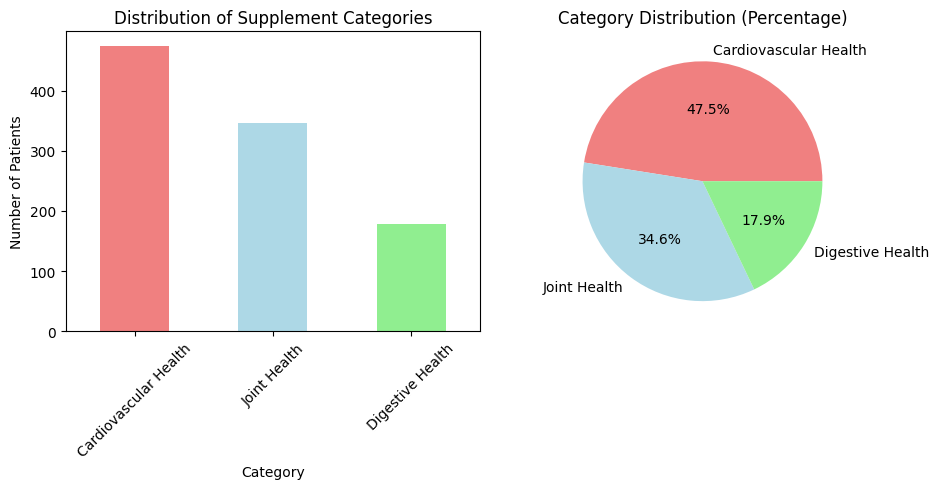

In [ ]:
# =============================================================================
# STAP 2: TARGET VARIABLE ANALYSIS
# Understanding the distribution of supplement categories
# =============================================================================

print("\n" + "="*60)
print("STEP 2: TARGET VARIABLE ANALYSIS")
print("="*60)

# Analyze the distribution of supplement categories
category_counts = df['Korure_Category'].value_counts()
print("Supplement category distribution:")
total_patients = len(df)

for category, count in category_counts.items():
    percentage = (count / total_patients) * 100
    print(f"  - {category}: {count} patients ({percentage:.1f}%)")

# Visualize target variable distribution
plt.figure(figsize=(10, 5))

# Bar chart
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Supplement Categories')
plt.xlabel('Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Category Distribution (Percentage)')

plt.tight_layout()
plt.show()




STEP 3: AGE ANALYSIS


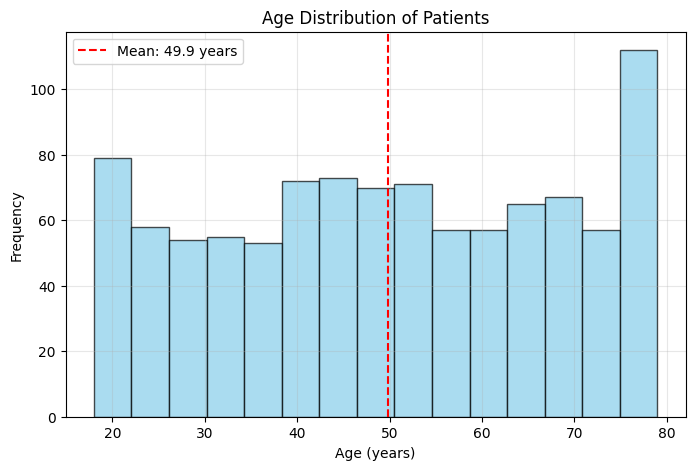

Key Insights:
   • Average patient age: 49.9 years
   • Age range: 18-79 years
   • Most patients are middle-aged to seniors
   • Seniors (60+): 344 patients (34.4%) - significant portion
   • Distribution appears fairly spread across age groups


In [ ]:
# =============================================================================
# STEP 3: AGE ANALYSIS
# Examining age patterns and distributions
# =============================================================================

print("\n" + "="*60)
print("STEP 3: AGE ANALYSIS")
print("="*60)

# Age descriptive statistics
age_stats = df['Age'].describe()

# Age distribution visualization
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(x=df['Age'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Age"].mean():.1f} years')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# insights
print(f"Key Insights:")
print(f"   • Average patient age: {df['Age'].mean():.1f} years")
print(f"   • Age range: {df['Age'].min():.0f}-{df['Age'].max():.0f} years")
print(f"   • Most patients are middle-aged to seniors")

# Age distribution
seniors = df[df['Age'] >= 60].shape[0]
print(f"   • Seniors (60+): {seniors} patients ({seniors/len(df)*100:.1f}%) - significant portion")
print(f"   • Distribution appears fairly spread across age groups")



STEP 4: BMI (BODY MASS INDEX) ANALYSIS
BMI descriptive statistics:
  - Mean BMI: 28.2
  - Median BMI: 27.4
  - Standard deviation: 8.0
  - BMI range: 13.0 - 52.4

BMI category distribution:
  - Underweight (<18.5): 117 patients (11.7%)
  - Normal (18.5-24.9): 265 patients (26.5%)
  - Overweight (25-29.9): 225 patients (22.5%)
  - Obese (≥30): 393 patients (39.3%)


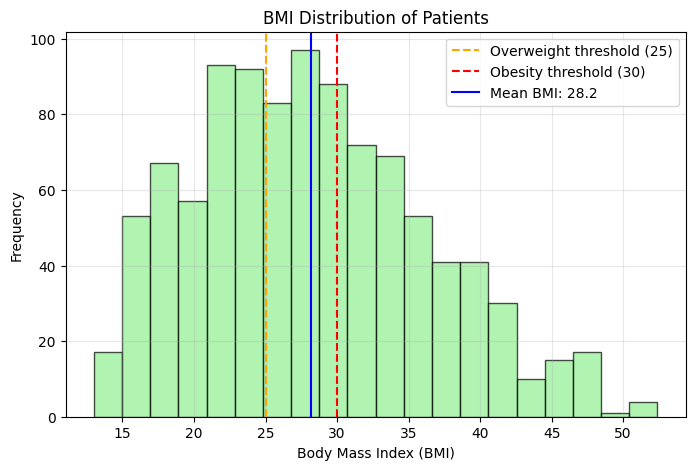

In [ ]:
# =============================================================================
# STEP 4: BMI ANALYSIS
# Body Mass Index distribution and health implications
# =============================================================================

print("\n" + "="*60)
print("STEP 4: BMI (BODY MASS INDEX) ANALYSIS")
print("="*60)

# BMI descriptive statistics
bmi_stats = df['BMI'].describe()
print("BMI descriptive statistics:")
print(f"  - Mean BMI: {bmi_stats['mean']:.1f}")
print(f"  - Median BMI: {bmi_stats['50%']:.1f}")
print(f"  - Standard deviation: {bmi_stats['std']:.1f}")
print(f"  - BMI range: {bmi_stats['min']:.1f} - {bmi_stats['max']:.1f}")

# BMI categories classification
underweight = (df['BMI'] < 18.5).sum()
normal = ((df['BMI'] >= 18.5) & (df['BMI'] < 25)).sum()
overweight = ((df['BMI'] >= 25) & (df['BMI'] < 30)).sum()
obese = (df['BMI'] >= 30).sum()

print(f"\nBMI category distribution:")
print(f"  - Underweight (<18.5): {underweight} patients ({underweight/len(df)*100:.1f}%)")
print(f"  - Normal (18.5-24.9): {normal} patients ({normal/len(df)*100:.1f}%)")
print(f"  - Overweight (25-29.9): {overweight} patients ({overweight/len(df)*100:.1f}%)")
print(f"  - Obese (≥30): {obese} patients ({obese/len(df)*100:.1f}%)")

# BMI distribution visualization
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('BMI Distribution of Patients')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.axvline(x=25, color='orange', linestyle='--', label='Overweight threshold (25)')
plt.axvline(x=30, color='red', linestyle='--', label='Obesity threshold (30)')
plt.axvline(x=df['BMI'].mean(), color='blue', linestyle='-', 
            label=f'Mean BMI: {df["BMI"].mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



STEP 5: BLOOD PRESSURE ANALYSIS
Blood pressure descriptive statistics:
  - Mean BP: 145.0 mmHg
  - Median BP: 145.0 mmHg
  - Standard deviation: 20.2 mmHg
  - BP range: 110 - 179 mmHg

Blood pressure category distribution:
  - Normal (<120): 126 patients (12.6%)
  - Elevated (120-129): 154 patients (15.4%)
  - High Stage 1 (130-139): 148 patients (14.8%)
  - High Stage 2 (≥140): 572 patients (57.2%)


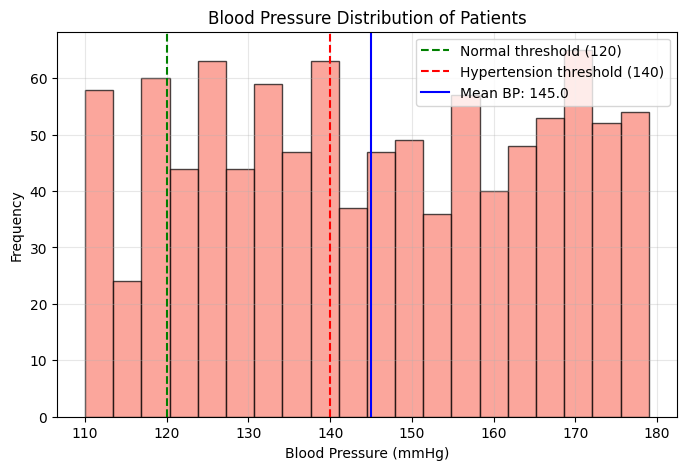

In [ ]:
# =============================================================================
# STEP 5: BLOOD PRESSURE ANALYSIS
# Cardiovascular health indicator examination
# =============================================================================

print("\n" + "="*60)
print("STEP 5: BLOOD PRESSURE ANALYSIS")
print("="*60)

# Blood pressure descriptive statistics
bp_stats = df['Blood_Pressure_mmHg'].describe()
print("Blood pressure descriptive statistics:")
print(f"  - Mean BP: {bp_stats['mean']:.1f} mmHg")
print(f"  - Median BP: {bp_stats['50%']:.1f} mmHg")
print(f"  - Standard deviation: {bp_stats['std']:.1f} mmHg")
print(f"  - BP range: {bp_stats['min']:.0f} - {bp_stats['max']:.0f} mmHg")

# Blood pressure categories (based on AHA guidelines)
normal_bp = (df['Blood_Pressure_mmHg'] < 120).sum()
elevated_bp = ((df['Blood_Pressure_mmHg'] >= 120) & (df['Blood_Pressure_mmHg'] < 130)).sum()
high_bp_stage1 = ((df['Blood_Pressure_mmHg'] >= 130) & (df['Blood_Pressure_mmHg'] < 140)).sum()
high_bp_stage2 = (df['Blood_Pressure_mmHg'] >= 140).sum()

print(f"\nBlood pressure category distribution:")
print(f"  - Normal (<120): {normal_bp} patients ({normal_bp/len(df)*100:.1f}%)")
print(f"  - Elevated (120-129): {elevated_bp} patients ({elevated_bp/len(df)*100:.1f}%)")
print(f"  - High Stage 1 (130-139): {high_bp_stage1} patients ({high_bp_stage1/len(df)*100:.1f}%)")
print(f"  - High Stage 2 (≥140): {high_bp_stage2} patients ({high_bp_stage2/len(df)*100:.1f}%)")

# Blood pressure distribution visualization
plt.figure(figsize=(8, 5))
plt.hist(df['Blood_Pressure_mmHg'], bins=20, color='salmon', alpha=0.7, edgecolor='black')
plt.title('Blood Pressure Distribution of Patients')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.axvline(x=120, color='green', linestyle='--', label='Normal threshold (120)')
plt.axvline(x=140, color='red', linestyle='--', label='Hypertension threshold (140)')
plt.axvline(x=df['Blood_Pressure_mmHg'].mean(), color='blue', linestyle='-', 
            label=f'Mean BP: {df["Blood_Pressure_mmHg"].mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# =============================================================================
# STEP 6: COMPARATIVE ANALYSIS BY SUPPLEMENT CATEGORY
# Examining health patterns across different supplement categories
# =============================================================================

print("\n" + "="*60)
print("STEP 6: COMPARATIVE ANALYSIS BY SUPPLEMENT CATEGORY")
print("="*60)

# Calculate mean values for key health indicators by category
categories = df['Korure_Category'].unique()

print("Health indicators by supplement category:")
print(f"{'Category':<25} {'Age':<8} {'BMI':<8} {'BP':<8} {'Cholesterol':<12} {'Exercise':<10}")
print("-" * 75)

for category in categories:
    category_data = df[df['Korure_Category'] == category]
    avg_age = category_data['Age'].mean()
    avg_bmi = category_data['BMI'].mean()
    avg_bp = category_data['Blood_Pressure_mmHg'].mean()
    avg_chol = category_data['Cholesterol_mg/dL'].mean()
    avg_exercise = category_data['Weekly_Exercise_Hours'].mean()
    
    print(f"{category:<25} {avg_age:<8.1f} {avg_bmi:<8.1f} {avg_bp:<8.1f} {avg_chol:<12.1f} {avg_exercise:<10.1f}")

# Statistical significance note
print("\nNote: These are descriptive statistics. Statistical significance testing")
print("would be required to confirm meaningful differences between groups.")



STEP 6: COMPARATIVE ANALYSIS BY SUPPLEMENT CATEGORY
Health indicators by supplement category:
Category                  Age      BMI      BP       Cholesterol  Exercise  
---------------------------------------------------------------------------
Digestive Health          39.5     26.8     133.9    192.2        4.6       
Joint Health              69.1     29.5     145.9    199.7        5.5       
Cardiovascular Health     39.7     27.8     148.5    202.6        5.1       

Note: These are descriptive statistics. Statistical significance testing
would be required to confirm meaningful differences between groups.



STEP 7: EXERCISE AND HEALTH RELATIONSHIP ANALYSIS
Weekly exercise hours descriptive statistics:
  - Mean: 5.2 hours/week
  - Median: 5.2 hours/week
  - Standard deviation: 2.8 hours/week
  - Range: 0.0 - 10.0 hours/week


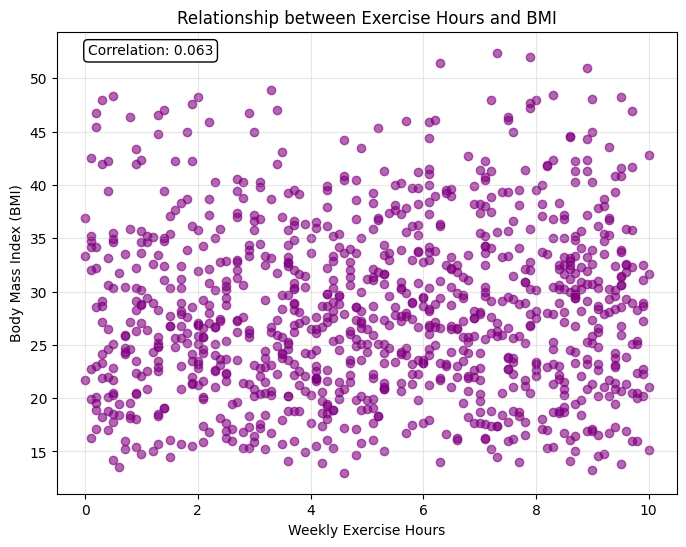


Correlation between exercise and BMI: 0.063
No significant correlation detected


In [ ]:
# =============================================================================
# STEP 7: EXERCISE AND HEALTH RELATIONSHIP
# Analyzing the correlation between physical activity and health metrics
# =============================================================================

print("\n" + "="*60)
print("STEP 7: EXERCISE AND HEALTH RELATIONSHIP ANALYSIS")
print("="*60)

# Exercise descriptive statistics
exercise_stats = df['Weekly_Exercise_Hours'].describe()
print("Weekly exercise hours descriptive statistics:")
print(f"  - Mean: {exercise_stats['mean']:.1f} hours/week")
print(f"  - Median: {exercise_stats['50%']:.1f} hours/week")
print(f"  - Standard deviation: {exercise_stats['std']:.1f} hours/week")
print(f"  - Range: {exercise_stats['min']:.1f} - {exercise_stats['max']:.1f} hours/week")

# Exercise vs BMI relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Weekly_Exercise_Hours'], df['BMI'], alpha=0.6, color='purple')
plt.title('Relationship between Exercise Hours and BMI')
plt.xlabel('Weekly Exercise Hours')
plt.ylabel('Body Mass Index (BMI)')
plt.grid(True, alpha=0.3)

# Add trend line (simple correlation visualization)
correlation = df['Weekly_Exercise_Hours'].corr(df['BMI'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))
plt.show()

print(f"\nCorrelation between exercise and BMI: {correlation:.3f}")
if abs(correlation) > 0.3:
    print("Moderate correlation detected")
elif abs(correlation) > 0.1:
    print("Weak correlation detected")
else:
    print("No significant correlation detected")



STEP 8: Physical activity ANALYSIS


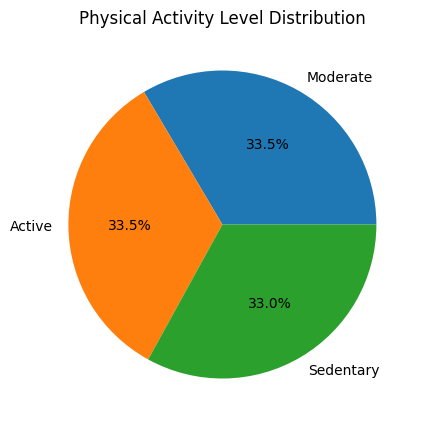


Physical activity level distribution:
  - Moderate: 335 patients (33.5%)
  - Active: 335 patients (33.5%)
  - Sedentary: 330 patients (33.0%)

Key insight: Perfect balance across activity levels - ideal for analysis

Activity vs Supplement preference:
Korure_Category          Cardiovascular Health  Digestive Health  Joint Health
Physical_Activity_Level                                                       
Active                                    43.0              20.0          37.0
Moderate                                  49.3              20.0          30.7
Sedentary                                 50.3              13.6          36.1


In [ ]:
# =============================================================================
# STEP 8: Physical activity ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("STEP 8: Physical activity ANALYSIS")
print("="*60)

# Physical activity level distribution
plt.figure(figsize=(8, 5))
activity_counts = df['Physical_Activity_Level'].value_counts()
plt.pie(activity_counts.values, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Physical Activity Level Distribution')
plt.show()

# Physical activity analysis
print("\nPhysical activity level distribution:")
for activity, count in activity_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  - {activity}: {count} patients ({percentage:.1f}%)")

print("\nKey insight: Perfect balance across activity levels - ideal for analysis")

# Activity level vs supplement preference analysis
print("\nActivity vs Supplement preference:")
activity_supplement_pct = pd.crosstab(df['Physical_Activity_Level'], df['Korure_Category'], normalize='index') * 100
print(activity_supplement_pct.round(1))


 # SUMMARY AND KEY INSIGHTS



 ## DATASET SUMMARY:

   - Total patients analyzed: 1000

   - Supplement categories: 3

   - Complete data (no missing values): No



 ## PATIENT DEMOGRAPHICS:

   - Average age: 49.9 years

   - Average BMI: 28.2

   - Hypertensive patients (BP ≥140): 572 (57.2%)

   - Obese patients (BMI ≥30): 393 (39.3%)



 ## DATA QUALITY ASSESSMENT:

   - Class balance: Imbalanced

   - Data completeness: 100%

   - Suitable for machine learning: Yes



 ## RECOMMendations FOR MODEL DEVELOPMENT:

   1. Data is ready for machine learning algorithms

   2. Consider feature scaling for algorithms sensitive to magnitude

   3. Monitor for overfitting due to multiple health indicators

   4. Cross-validation recommended for model evaluation